## 1.导包

In [1]:

import os
#data analysis libraries
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 
plt.rcParams['axes.unicode_minus']=False  #用来正常显示负号 


#ignore warnings
import warnings
warnings.filterwarnings('ignore')



#设置行不限制数量
#pd.set_option('display.max_rows',None)
#最后的的参数可以限制输出行的数量

#设置列不限制数量
pd.set_option('display.max_columns',None)

In [2]:
!ls

DataTransforme.ipynb
bobo_ML.ipynb
公开数据集
更新数据集
加油站营销推荐算法-MPC V1.0 final.pdf


In [3]:
!ls 公开数据集/

Bank_data.csv          PetrolStation_data.csv VehicleSystem_data.csv


## 2.初步探索数据

In [4]:
bank = pd.read_csv('./公开数据集/Bank_data.csv')
petro = pd.read_csv('./公开数据集/PetrolStation_data.csv')
vehicle = pd.read_csv('./公开数据集/VehicleSystem_data.csv')

In [5]:
bank.shape

(2537, 12)

In [6]:
petro.shape

(2537, 6)

In [7]:
vehicle.shape

(2537, 7)

In [8]:
#拼接三张表
origin_data = pd.concat([bank, petro, vehicle], axis=1)

In [9]:
origin_data.describe(include = 'all')

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,ID,weather,time,coupon,expiration,Y,ID,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
count,2537.00000,2537,2537,2537,2537,2537,2537,2522,2506,2510,2521,2503,2537.00000,2537,2537,2537,2537,2537.000000,2537.00000,2537,2537,2537.000000,2537.000000,2537.000000,2537.000000
unique,NaN,2,8,5,6,25,9,5,5,5,5,5,NaN,3,5,5,2,NaN,NaN,3,4,NaN,NaN,NaN,NaN
top,NaN,Male,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,NaN,Sunny,6PM,Coffee House,1d,NaN,NaN,No Urgent Place,Alone,NaN,NaN,NaN,NaN
freq,NaN,1269,567,1036,883,372,408,992,676,941,1099,1249,NaN,2006,654,754,1437,NaN,NaN,1204,1493,NaN,NaN,NaN,NaN
mean,16465.87229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16465.87229,NaN,NaN,NaN,NaN,0.568388,16465.87229,NaN,NaN,0.569176,0.131257,0.223492,0.776508
std,3656.59043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3656.59043,NaN,NaN,NaN,NaN,0.495399,3656.59043,NaN,NaN,0.495289,0.337748,0.416668,0.416668
min,10004.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10004.00000,NaN,NaN,NaN,NaN,0.000000,10004.00000,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,13268.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13268.00000,NaN,NaN,NaN,NaN,0.000000,13268.00000,NaN,NaN,0.000000,0.000000,0.000000,1.000000
50%,16538.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16538.00000,NaN,NaN,NaN,NaN,1.000000,16538.00000,NaN,NaN,1.000000,0.000000,0.000000,1.000000
75%,19660.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19660.00000,NaN,NaN,NaN,NaN,1.000000,19660.00000,NaN,NaN,1.000000,0.000000,0.000000,1.000000


In [10]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,ID,weather,time,coupon,expiration,Y,ID,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,11263,Male,50plus,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,11263,Sunny,2PM,Coffee House,1d,1,11263,No Urgent Place,Friend(s),0,0,0,1
1,20136,Female,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,20136,Sunny,7AM,Bar,1d,0,20136,Work,Alone,1,0,1,0
2,14763,Female,50plus,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,14763,Sunny,7AM,Coffee House,1d,0,14763,Work,Alone,1,0,0,1
3,12612,Female,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,12612,Sunny,10AM,Carry out & Take away,2h,0,12612,No Urgent Place,Kid(s),1,0,0,1
4,17850,Female,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,17850,Snowy,2PM,Coffee House,2h,0,17850,No Urgent Place,Partner,1,0,0,1


In [11]:
#display(origin_data.T.drop_duplicates(keep='first').T)
# 删除 重复的列
origin_data = origin_data.T.drop_duplicates(keep='first').T 

In [12]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,11263,Male,50plus,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1
1,20136,Female,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0
2,14763,Female,50plus,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1
3,12612,Female,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1
4,17850,Female,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1


In [13]:
#修剪age列，将50plus替换为55，below21替换为15
# 当然可以通过lambda 函数将这个比较简单的函数一行带过
origin_data['age'] = origin_data["age"].apply(lambda x: x.replace("50plus","55"))
origin_data['age'] = origin_data["age"].apply(lambda x: x.replace("below21","15"))
#将性别（male/female)映射为数值（1/0）
origin_data['gender'] = origin_data["gender"].apply(lambda x: x.replace("Male","1"))
origin_data['gender'] = origin_data["gender"].apply(lambda x: x.replace("Female","0"))

In [14]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
0,11263,1,55,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1
1,20136,0,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0
2,14763,0,55,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1
3,12612,0,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1
4,17850,0,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1


In [15]:
#将这三列转为 int 型
origin_data[['ID','gender','age']] = origin_data[['ID','gender','age']].astype('int64')

In [16]:
origin_data.describe(include="all")

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp
count,2537.00000,2537.000000,2537.000000,2537,2537,2537,2537,2522,2506,2510,2521,2503,2537,2537,2537,2537,2537.0,2537,2537,2537.0,2537.0,2537.0,2537.0
unique,NaN,NaN,NaN,5,6,25,9,5,5,5,5,5,3,5,5,2,2.0,3,4,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,Sunny,6PM,Coffee House,1d,1.0,No Urgent Place,Alone,1.0,0.0,0.0,1.0
freq,NaN,NaN,NaN,1036,883,372,408,992,676,941,1099,1249,2006,654,754,1437,1442.0,1204,1493,1444.0,2204.0,1970.0,1970.0
mean,16465.87229,0.500197,32.729602,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3656.59043,0.500099,11.761338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10004.00000,0.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13268.00000,0.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16538.00000,1.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19660.00000,1.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2537 non-null   int64 
 1   gender                2537 non-null   int64 
 2   age                   2537 non-null   int64 
 3   maritalStatus         2537 non-null   object
 4   education             2537 non-null   object
 5   occupation            2537 non-null   object
 6   income                2537 non-null   object
 7   Bar                   2522 non-null   object
 8   CoffeeHouse           2506 non-null   object
 9   CarryAway             2510 non-null   object
 10  RestaurantLessThan20  2521 non-null   object
 11  Restaurant20To50      2503 non-null   object
 12  weather               2537 non-null   object
 13  time                  2537 non-null   object
 14  coupon                2537 non-null   object
 15  expiration            2537 non-null   

## Age feature

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


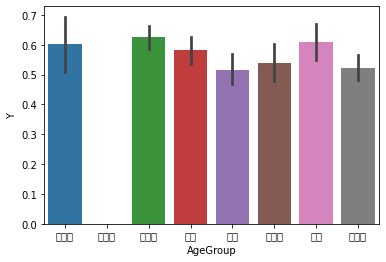

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
0,11263,1,55,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,快退休
1,20136,0,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,社畜
2,14763,0,55,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,快退休
3,12612,0,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,领导
4,17850,0,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,白领


In [18]:
##将[年龄]这一特征，进行分箱。
bins = [10,15,20,25,30, 35,40,45,60]##数据处理 封箱操作
labels = ['小学生', '大学生', '研究生', '社畜', '白领', '小组长', '领导', '快退休']
origin_data['AgeGroup'] = pd.cut(origin_data["age"], bins, labels = labels)
#draw a bar plot of Age vs. Y
sns.barplot(x="AgeGroup", y = "Y", data = origin_data)
plt.show()
origin_data.head()

In [19]:
# 分箱后，再转化为数值
# 将Age映射为数值int
age_mapping = {'小学生':1, '大学生':2, '研究生':3, '社畜':4, '白领':5, '小组长':6, '领导':7, '快退休':8}
origin_data['AgeGroup'] = origin_data['AgeGroup'].map(age_mapping)

In [20]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
0,11263,1,55,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8
1,20136,0,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4
2,14763,0,55,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8
3,12612,0,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7
4,17850,0,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5


## maritalStatus featurre

In [21]:
#先查看 缺失值情况
origin_data['maritalStatus'].isnull().sum()

0

In [22]:
# 再查看 maritalStatus 特征信息。
origin_data['maritalStatus'].value_counts()

Married partner      1036
Single                949
Unmarried partner     433
Divorced               96
Widowed                23
Name: maritalStatus, dtype: int64

发现基本分好桶了，直接转化为数值即可。

In [23]:
# 将maritalStatus映射为数值int
maritalStatu_mapping = {'Married partner':1, 'Single':2, 'Unmarried partner':3, 'Divorced':4, 'Widowed':5}
origin_data['maritalStatus'] = origin_data['maritalStatus'].map(maritalStatu_mapping)

In [24]:
origin_data.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
0,11263,1,55,5,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,8
1,20136,0,26,1,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1,Sunny,7AM,Bar,1d,0,Work,Alone,1,0,1,0,4
2,14763,0,55,2,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1,Sunny,7AM,Coffee House,1d,0,Work,Alone,1,0,0,1,8
3,12612,0,41,1,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1,Sunny,10AM,Carry out & Take away,2h,0,No Urgent Place,Kid(s),1,0,0,1,7
4,17850,0,31,1,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1,Snowy,2PM,Coffee House,2h,0,No Urgent Place,Partner,1,0,0,1,5


## education feature

In [45]:
#先查看 缺失值情况
origin_data['education'].isnull().sum()

0

In [47]:
# 再查看education 特征信息
origin_data['education'].value_counts()

Some college - no degree                  883
Bachelors degree                          880
Graduate degree (Masters or Doctorate)    361
Associates degree                         212
High School Graduate                      187
Some High School                           14
Name: education, dtype: int64

In [48]:
# 将education映射为数值int
education_mapping = {'Some college - no degree':1, 'Bachelors degree':2, 'Graduate degree (Masters or Doctorate)':3, 'Associates degree':4, 'High School Graduate':5, 'Some High School':5}
origin_data['education'] = origin_data['education'].map(education_mapping)

In [51]:
origin_data.sample(5)

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
650,13728,0,55,2,2,Sales & Related,$25000 - $37499,never,less1,1~3,1~3,1~3,Sunny,7AM,Coffee House,2h,0,Work,Alone,1,1,0,1,8
1981,11575,1,31,2,5,Computer & Mathematical,$25000 - $37499,less1,never,1~3,less1,never,Sunny,6PM,Coffee House,2h,0,No Urgent Place,Friend(s),0,0,0,1,5
1998,20505,1,15,2,1,Student,Less than $12500,1~3,1~3,1~3,less1,less1,Sunny,7AM,Restaurant(<20),1d,0,Work,Alone,0,0,0,1,1
816,10571,1,31,2,1,Sales & Related,$37500 - $49999,4~8,gt8,gt8,1~3,less1,Sunny,2PM,Coffee House,1d,1,No Urgent Place,Friend(s),0,0,0,1,5
478,19730,1,26,2,1,Unemployed,$87500 - $99999,never,1~3,4~8,less1,never,Sunny,10AM,Coffee House,2h,0,No Urgent Place,Alone,1,0,0,1,4


In [56]:
origin_data.describe(include = 'all')

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,weather,time,coupon,expiration,Y,destination,passanger,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,AgeGroup
count,2537.00000,2537.000000,2537.000000,2537.000000,2537.000000,2537,2537,2522,2506,2510,2521,2503,2537,2537,2537,2537,2537.0,2537,2537,2537.0,2537.0,2537.0,2537.0,2537.0
unique,NaN,NaN,NaN,NaN,NaN,25,9,5,5,5,5,5,3,5,5,2,2.0,3,4,2.0,2.0,2.0,2.0,7.0
top,NaN,NaN,NaN,NaN,NaN,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1,Sunny,6PM,Coffee House,1d,1.0,No Urgent Place,Alone,1.0,0.0,0.0,1.0,3.0
freq,NaN,NaN,NaN,NaN,NaN,372,408,992,676,941,1099,1249,2006,654,754,1437,1442.0,1204,1493,1444.0,2204.0,1970.0,1970.0,567.0
mean,16465.87229,0.500197,32.729602,1.865195,2.199054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3656.59043,0.500099,11.761338,0.891136,1.224178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10004.00000,0.000000,15.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13268.00000,0.000000,21.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16538.00000,1.000000,31.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19660.00000,1.000000,41.000000,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    2537 non-null   int64   
 1   gender                2537 non-null   int64   
 2   age                   2537 non-null   int64   
 3   maritalStatus         2537 non-null   int64   
 4   education             2537 non-null   int64   
 5   occupation            2537 non-null   object  
 6   income                2537 non-null   object  
 7   Bar                   2522 non-null   object  
 8   CoffeeHouse           2506 non-null   object  
 9   CarryAway             2510 non-null   object  
 10  RestaurantLessThan20  2521 non-null   object  
 11  Restaurant20To50      2503 non-null   object  
 12  weather               2537 non-null   object  
 13  time                  2537 non-null   object  
 14  coupon                2537 non-null   object  
 15  expi

## occupation feature

In [52]:
#先查看 缺失值情况
origin_data['occupation'].isnull().sum()

0

In [55]:
# 再查看education 特征信息
# 竟然有25种职业，这该怎么办？？？
origin_data['occupation'].value_counts()

Unemployed                                   372
Student                                      333
Computer & Mathematical                      301
Sales & Related                              198
Education&Training&Library                   191
Management                                   172
Office & Administrative Support              131
Arts Design Entertainment Sports & Media     118
Business & Financial                         113
Retired                                       99
Food Preparation & Serving Related            61
Transportation & Material Moving              44
Healthcare Support                            43
Healthcare Practitioners & Technical          43
Community & Social Services                   41
Legal                                         38
Architecture & Engineering                    35
Construction & Extraction                     34
Life Physical Social Science                  34
Protective Service                            34
Personal Care & Serv

<AxesSubplot:xlabel='gender', ylabel='Y'>

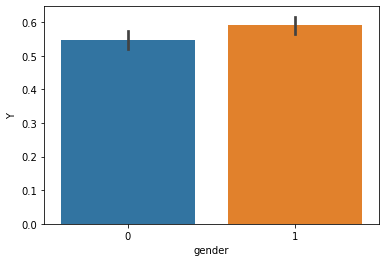

In [25]:
# 判断性别和打车的关系。
#draw a bar plot of survival by sex
sns.barplot(x = "gender", y = "Y", data = origin_data)

#print percentages of females vs. males that survive
#print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

#print("percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

In [26]:
bank.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,11263,Male,50plus,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1
1,20136,Female,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1
2,14763,Female,50plus,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1
3,12612,Female,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1
4,17850,Female,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1


In [27]:
bank.describe(include = "all")

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
count,2537.00000,2537,2537,2537,2537,2537,2537,2522,2506,2510,2521,2503
unique,NaN,2,8,5,6,25,9,5,5,5,5,5
top,NaN,Male,21,Married partner,Some college - no degree,Unemployed,$25000 - $37499,never,less1,1~3,1~3,less1
freq,NaN,1269,567,1036,883,372,408,992,676,941,1099,1249
mean,16465.87229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3656.59043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10004.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13268.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,16538.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,19660.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# 查看数据结构
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    2537 non-null   int64 
 1   gender                2537 non-null   object
 2   age                   2537 non-null   object
 3   maritalStatus         2537 non-null   object
 4   education             2537 non-null   object
 5   occupation            2537 non-null   object
 6   income                2537 non-null   object
 7   Bar                   2522 non-null   object
 8   CoffeeHouse           2506 non-null   object
 9   CarryAway             2510 non-null   object
 10  RestaurantLessThan20  2521 non-null   object
 11  Restaurant20To50      2503 non-null   object
dtypes: int64(1), object(11)
memory usage: 238.0+ KB


In [29]:
#查看数据形状
bank.shape

(2537, 12)

## 3.简单数据处理

In [30]:
print(bank.dtypes)

ID                       int64
gender                  object
age                     object
maritalStatus           object
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
dtype: object


In [31]:
bank.columns

Index(['ID', 'gender', 'age', 'maritalStatus', 'education', 'occupation',
       'income', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20',
       'Restaurant20To50'],
      dtype='object')

In [32]:
#‘gender’列统一转为小写字母
bank['gender'] = bank['gender'].str.lower()

In [33]:
bank['gender']

0         male
1       female
2       female
3       female
4       female
         ...  
2532    female
2533      male
2534      male
2535      male
2536    female
Name: gender, Length: 2537, dtype: object

In [34]:
bank.head()

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,11263,male,50plus,Widowed,Some college - no degree,Construction & Extraction,Less than $12500,never,never,less1,1~3,less1
1,20136,female,26,Married partner,Some college - no degree,Office & Administrative Support,$75000 - $87499,never,never,1~3,4~8,less1
2,14763,female,50plus,Single,Bachelors degree,Retired,$37500 - $49999,never,never,less1,4~8,less1
3,12612,female,41,Married partner,Bachelors degree,Legal,$100000 or More,never,1~3,1~3,1~3,less1
4,17850,female,31,Married partner,Some college - no degree,Computer & Mathematical,$100000 or More,less1,less1,gt8,4~8,less1


**统计各列的不同值出现次数**

In [35]:
bank['gender'].value_counts()

male      1269
female    1268
Name: gender, dtype: int64

In [36]:
bank['maritalStatus'].value_counts()

Married partner      1036
Single                949
Unmarried partner     433
Divorced               96
Widowed                23
Name: maritalStatus, dtype: int64

In [37]:
bank['education'].value_counts()

Some college - no degree                  883
Bachelors degree                          880
Graduate degree (Masters or Doctorate)    361
Associates degree                         212
High School Graduate                      187
Some High School                           14
Name: education, dtype: int64

In [38]:
bank['occupation'].value_counts()

Unemployed                                   372
Student                                      333
Computer & Mathematical                      301
Sales & Related                              198
Education&Training&Library                   191
Management                                   172
Office & Administrative Support              131
Arts Design Entertainment Sports & Media     118
Business & Financial                         113
Retired                                       99
Food Preparation & Serving Related            61
Transportation & Material Moving              44
Healthcare Support                            43
Healthcare Practitioners & Technical          43
Community & Social Services                   41
Legal                                         38
Architecture & Engineering                    35
Construction & Extraction                     34
Life Physical Social Science                  34
Protective Service                            34
Personal Care & Serv

In [39]:
bank['income'].value_counts()

$25000 - $37499     408
$100000 or More     351
$50000 - $62499     350
$12500 - $24999     347
$37500 - $49999     344
Less than $12500    214
$75000 - $87499     189
$87500 - $99999     168
$62500 - $74999     166
Name: income, dtype: int64

In [40]:
bank['age'].value_counts()

21         567
26         492
31         414
50plus     354
36         249
41         220
46         143
below21     98
Name: age, dtype: int64

In [41]:
bank['RestaurantLessThan20'].value_counts()

1~3      1099
4~8       720
less1     421
gt8       244
never      37
Name: RestaurantLessThan20, dtype: int64

In [42]:
bank['Restaurant20To50'].value_counts()

less1    1249
1~3       648
never     408
4~8       155
gt8        43
Name: Restaurant20To50, dtype: int64

## 4. 缺失值的处理

```python
df.isnull() #查看缺失值
df.notnull() #查看不是缺失值的数据
df.dropna() #删除缺失值
df.fillna() #填补缺失值
```

In [43]:
bank.isnull().sum()

ID                       0
gender                   0
age                      0
maritalStatus            0
education                0
occupation               0
income                   0
Bar                     15
CoffeeHouse             31
CarryAway               27
RestaurantLessThan20    16
Restaurant20To50        34
dtype: int64

In [44]:
bank[bank.Bar.isnull()]

,ID,gender,age,maritalStatus,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
11,22156,female,31,Single,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,less1,gt8,1~3,less1
66,10519,male,50plus,Divorced,Some college - no degree,Management,$62500 - $74999,NaN,NaN,NaN,NaN,NaN
102,10857,male,41,Married partner,Bachelors degree,Unemployed,$87500 - $99999,NaN,NaN,NaN,NaN,NaN
657,22168,female,31,Single,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,less1,gt8,1~3,less1
933,12884,female,36,Married partner,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,4~8,1~3,1~3
1094,20382,male,41,Married partner,Bachelors degree,Arts Design Entertainment Sports & Media,$37500 - $49999,NaN,less1,1~3,4~8,1~3
1335,22170,female,31,Single,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,less1,gt8,1~3,less1
1441,22171,female,31,Single,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,less1,gt8,1~3,less1
1498,12879,female,36,Married partner,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,4~8,1~3,1~3
1565,22169,female,31,Single,Associates degree,Arts Design Entertainment Sports & Media,$75000 - $87499,NaN,less1,gt8,1~3,less1
